In [1]:
import sys
import glob
sys.path.append("../")
import CryoAsicAnalysis
import CryoAsicEventViewer
import CryoAsicFile

import matplotlib.pyplot as plt 
import numpy as np
plt.style.use("~/evanstyle.mplstyle")

In [2]:
datapath = "../../../data/asicboard2-gXe-NoDewar-6-21-2024/"
datfiles = glob.glob(datapath+"*.dat")
h5files = glob.glob(datapath+"*.h5")

chmap_file = "../config/channel_map_template.txt"
tilemap_file = "../config/tile_map_template.txt"

In [9]:
#check if any dat files haven't been converted yet, and do so
#OR you can auto reload all files
reload_all = True
for df in datfiles:
    filetag = df.split("/")[-1]
    filetag = filetag.split(".")[0]
    found = False
    for hf in h5files:
        hfiletag = hf.split("/")[-1]
        hfiletag = hfiletag.split(".")[0]
        if(hfiletag == filetag):
            found = True
            break
    
    #if no h5 matching file was found, do the conversion
    if(found == False or reload_all):
        cf = CryoAsicFile.CryoAsicFile(df, chmap_file, tilemap_file)
        cf.load_raw_data(nevents=10)
        cf.group_into_pandas()
        outfile_name = datapath+filetag+".h5"
        cf.save_to_hdf5(outfile_name)



Finished reading raw binary, now descrambling the data
Done loading 10 CRYO ASIC events
Saving dataframe to file: ../../../data/asicboard2-gXe-NoDewar-6-21-2024/LongNoise_948_6g_12pt.h5


/Users/ejangelico/Documents/Stanford/CRYO ASIC/Software/cryo-asic-analysis/notebooks/../CryoAsicFile.py:220: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Channels', 'Timestamp', 'Data', 'ChannelTypes', 'ChannelPositions',
       'Scope'],
      dtype='object')]

  #Here, we want to add the global position of the strip. Find the definitions


In [3]:
infiles = glob.glob(datapath+"*.h5")
infile = infiles[0]
#key_channel : this channel is disabled, very specific purpose to look for misalignment issues
#dead_channels : marked for analysis purposes
#baseline : used for calculating baseline calibrations, noise calculations, etc. 
config = { 
    "baseline":[10, 20],
    "sampling_rate":1, 
    "gain": 6,
    "pt": 1.2,
    "pulse_threshold": 100, 
    "mv_per_adc": 1800./4096, 
    "key_channel": None, 
    "dead_channels": []
}
cv = CryoAsicEventViewer.CryoAsicEventViewer(infile, config)
cv.baseline_subtract()

ca = CryoAsicAnalysis.CryoAsicAnalysis(infile, config)



loading hdf5 file ../../../data/asicboard2-gXe-NoDewar-6-21-2024/LongNoise_948_6g_12pt.h5
Done loading
loading hdf5 file ../../../data/asicboard2-gXe-NoDewar-6-21-2024/LongNoise_948_6g_12pt.h5
Done loading


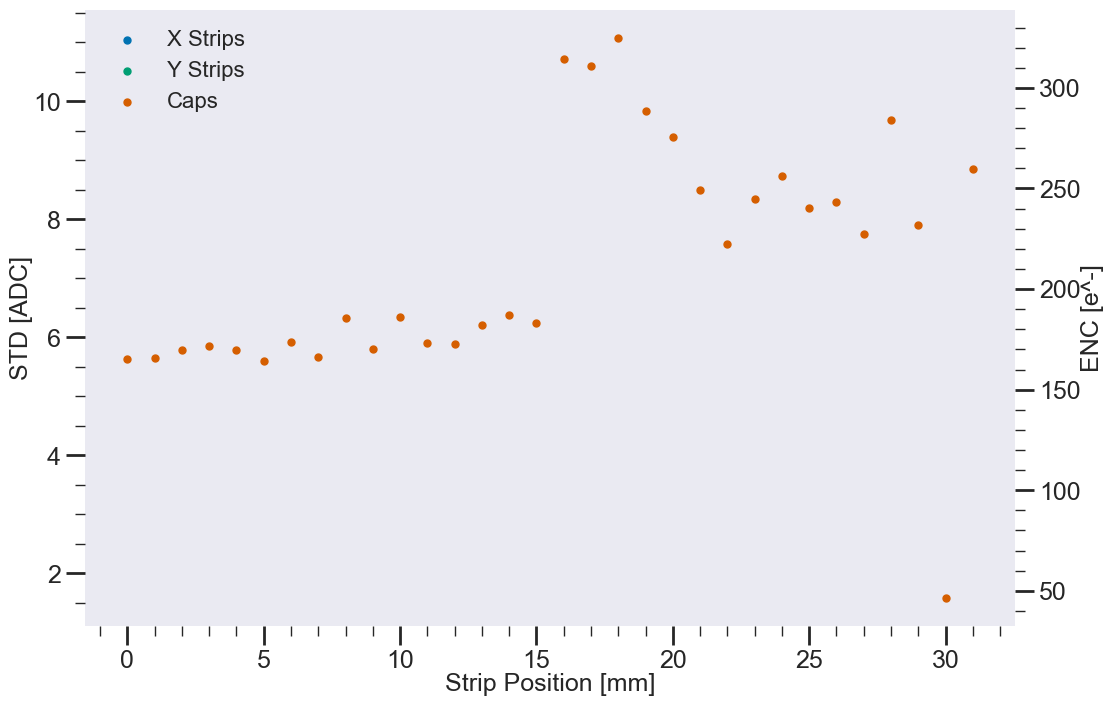

(<Figure size 1200x800 with 2 Axes>,
 <Axes: xlabel='Strip Position [mm]', ylabel='STD [ADC]'>,
 <Axes: ylabel='ENC [e^-]'>)

In [17]:

ca.plot_stds_strip_position()

In [16]:
ca.noise_df

,Channel,Freqs,PSD,STD
0,0,NaN,NaN,10.755849
1,1,NaN,NaN,10.514351
2,2,NaN,NaN,9.604897
3,3,NaN,NaN,10.387738
4,4,NaN,NaN,5.631116
...,...,...,...,...
59,59,NaN,NaN,6.06121
60,60,NaN,NaN,9.685999
61,61,NaN,NaN,7.898715
62,62,NaN,NaN,1.587579
